# **Predict Renewable Surpass**
This notebook combines **Linear Regression** and **Polynomial Regression** approaches to predict when renewable electricity generation will surpass non-renewables in Europe.

## Objectives

* The goal of this notebook is to analyze historical electricity generation data in Europe and predict the year when renewable electricity production will surpass non renewable production. 
* Apply **two modeling approaches**:
    1. Linear Regression
    2. Polynomial Regression
* Predict the year when renewable generation surpasses non-renewables.

## Inputs

* Dataset: cleaned_european_countries_dataset.csv containing:
    * year: Year of data collection 
    * country_name: Name of the European country
    * product: Type of energy source 
    * value: Electricity generation in GWh

## Outputs
* Forecast plots for renewables vs non-renewables.
* Crossover year prediction for each method.
* Summary table of predictions.

## Additional Comments

* The prediction assumes linear trends for renewables and non renewables. Real world changes (e.g., policy shifts, technological advances) may cause deviations.
* Renewable sources include Hydro, Solar, Wind, Geothermal, Other renewables, and Combustible renewables.
* Non renewables include Coal, Oil, Natural Gas, Nuclear, and other fossil fuels.
* The dataset is aggregated across all European countries.
* Polynomial regression often fits better historically but can overfit, so results should be interpreted carefully.
---

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# Load the dataset
df = pd.read_csv('../data\\cleaned_european_countries_dataset.csv')
df.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share,date
0,Austria,2010,1,Hydro,2579.264,39502.566,0.0,0.437055,2010-01-01
1,Austria,2010,1,Solar,2.864,84.421,0.0,0.000485,2010-01-01
2,Austria,2010,1,Geothermal,0.111,1.332,0.0,0.000019,2010-01-01
3,Austria,2010,1,Total combustible fuels,3117.160,26042.221,0.0,0.528201,2010-01-01
4,Austria,2010,1,Coal,693.730,6371.891,0.0,0.117552,2010-01-01


In [22]:
# Dataset summary
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print('Year range:', df['year'].min(), '-', df['year'].max())
print('Countries:', df['country_name'].nunique())
print('Products:', df['product'].nunique())

Rows: 120352
Columns: 9
Year range: 2010 - 2022
Countries: 34
Products: 27


In [23]:
# Define renewable and non-renewable categories
renewables_list = ['Hydro','Solar','Wind','Geothermal',
                   'Other renewables','Other renewables aggregated',
                   'Combustible renewables','Renewables']
non_renewables_list = ['Coal','Oil','Natural gas','Nuclear','Fossil fuels',
                       'Total combustible fuels','Other combustible non-renewables',
                       'Non-renewables']

In [24]:
# Aggregate yearly totals
renewables_yearly = df[df['product'].isin(renewables_list)].groupby('year')['value'].sum()
non_renewables_yearly = df[df['product'].isin(non_renewables_list)].groupby('year')['value'].sum()

In [ ]:
# Linear Regression
years = np.array(renewables_yearly.index).reshape(-1, 1)
model_renew_lin = LinearRegression().fit(years, renewables_yearly.values)
model_nonrenew_lin = LinearRegression().fit(years, non_renewables_yearly.values)

future_years = np.arange(df['year'].min(), 2101).reshape(-1, 1)
renew_pred_lin = model_renew_lin.predict(future_years)
nonrenew_pred_lin = model_nonrenew_lin.predict(future_years)

# Find crossover year for Linear Regression
crossover_lin = None
for i in range(len(future_years)):
    if renew_pred_lin[i] >= nonrenew_pred_lin[i]:
        crossover_lin = int(future_years[i][0])
        break
print(f'Linear Regression: Renewables surpass in {crossover_lin}')

Linear Regression: Renewables surpass in 2039


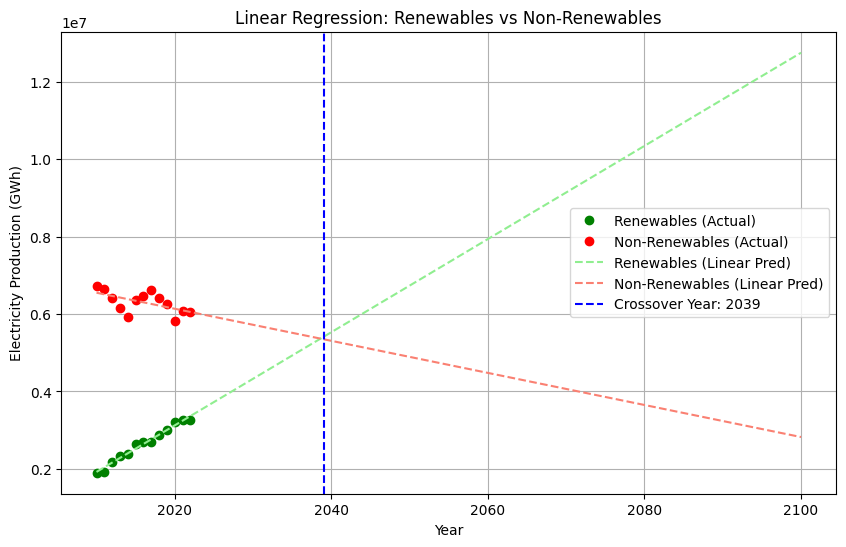

In [27]:
# Plot Linear Regression results
plt.figure(figsize=(10, 6))
plt.plot(years, renewables_yearly.values, 'o', label='Renewables (Actual)', color='green')
plt.plot(years, non_renewables_yearly.values, 'o', label='Non-Renewables (Actual)', color='red')
plt.plot(future_years, renew_pred_lin, '--', color='lightgreen', label='Renewables (Linear Pred)')
plt.plot(future_years, nonrenew_pred_lin, '--', color='salmon', label='Non-Renewables (Linear Pred)')
if crossover_lin:
    plt.axvline(crossover_lin, color='blue', linestyle='--', label=f'Crossover Year: {crossover_lin}')
plt.title('Linear Regression: Renewables vs Non-Renewables')
plt.xlabel('Year')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Polynomial Regression
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(years)
model_renew_poly = LinearRegression().fit(X_poly, renewables_yearly.values)
model_nonrenew_poly = LinearRegression().fit(X_poly, non_renewables_yearly.values)

future_poly = poly.transform(future_years)
renew_pred_poly = model_renew_poly.predict(future_poly)
nonrenew_pred_poly = model_nonrenew_poly.predict(future_poly)

# Find crossover year for Polynomial Regression
crossover_poly = None
for i in range(len(future_years)):
    if renew_pred_poly[i] >= nonrenew_pred_poly[i]:
        crossover_poly = int(future_years[i][0])
        break
print(f'Polynomial Regression: Renewables surpass in {crossover_poly}')

Polynomial Regression: Renewables surpass in 2027


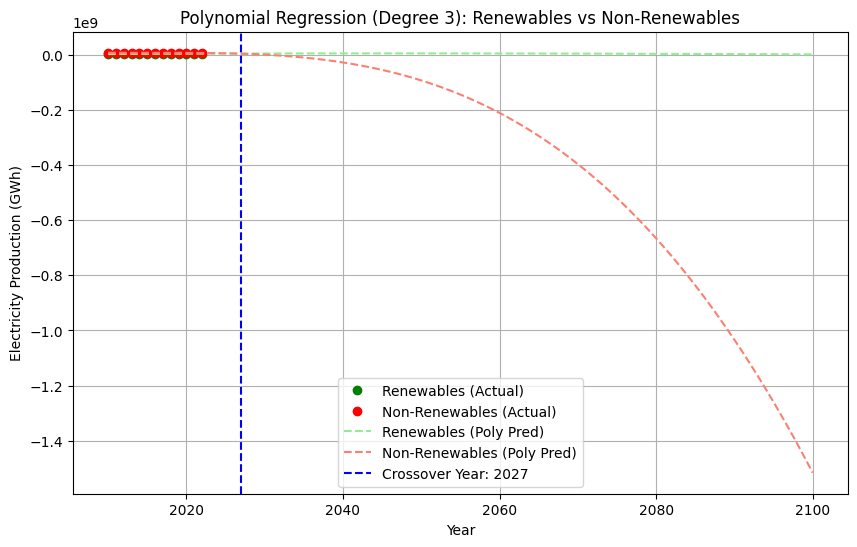

In [28]:
# Plot Polynomial Regression results
plt.figure(figsize=(10, 6))
plt.plot(years, renewables_yearly.values, 'o', label='Renewables (Actual)', color='green')
plt.plot(years, non_renewables_yearly.values, 'o', label='Non-Renewables (Actual)', color='red')
plt.plot(future_years, renew_pred_poly, '--', color='lightgreen', label='Renewables (Poly Pred)')
plt.plot(future_years, nonrenew_pred_poly, '--', color='salmon', label='Non-Renewables (Poly Pred)')
if crossover_poly:
    plt.axvline(crossover_poly, color='blue', linestyle='--', label=f'Crossover Year: {crossover_poly}')
plt.title(f'Polynomial Regression (Degree {degree}): Renewables vs Non-Renewables')
plt.xlabel('Year')
plt.ylabel('Electricity Production (GWh)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Summary table of results
summary_df = pd.DataFrame({
    'Method': ['Linear Regression', 'Polynomial Regression'],
    'Crossover Year': [crossover_lin, crossover_poly]
})
summary_df

,Method,Crossover Year
0,Linear Regression,2039
1,Polynomial Regression,2027


---
### Model Summary
* This analysis used two forecasting approaches, Linear Regression and Polynomial Regression, to predict when renewable electricity generation in Europe will surpass non renewable generation.

* Model 1 : Linear Regression
    * Fits a straight line trend to historical renewable and non renewable generation data.
    * Predicts a steady growth rate for renewables and a gradual decline for non renewables.
    * Crossover Year (Linear Model): 2039.

* Model 2 : Polynomial Regression
    * Fits a 3rd degree polynomial trend for more flexible curve fitting.
    * Captures possible acceleration in renewable growth and sharper declines in non renewables.
    * Crossover Year (Polynomial Model): 2027

* Comparison:
    * Both models indicate that renewables will surpass non renewables within the forecast horizon.
    * Linear regression provides a simpler, more conservative estimate.
    * Polynomial regression often aligns more closely with historical trends but risks overfitting.

* Conclusion:
    * The projected crossover year provides a critical reference point for policymakers and energy planners.
    * While both models point to different time frame, the exact year may vary depending on real world factors such as:
        * Energy policy changes
        * Technological innovations
        * Market or geopolitical shifts
----